In [43]:
import      numpy               as      np
import      matplotlib.pyplot   as      plt
from        lib_Experimentum    import  *
from        Alessandria         import  *


#path dove stanno i dati del fit
now_path        =   '../BRILLOUIN/TDP43/NO_ARS_12_02/analysis/'

### recupero info su dimensionalità
spectra_path = '../BRILLOUIN/TDP43/NO_ARS_12_02/'
spectra_filename    =   'NO_ARS_12_02'
n_rows    =   len(Import_from_Matlab(spectra_filename, spectra_path, var_name = 'y3'))
n_cols  =   len(Import_from_Matlab(spectra_filename, spectra_path, var_name = 'y3')[0])
###
matrix, rows, cols = Initialize_Matrix(0,0,n_rows,n_cols)

Ho inizializzato una matrice 101x83, per un totale di 8383 spettri


In [44]:

#1) Recupero info su posizioni + info su chi è bono e chi no e su VIPA (questo solo per matrix[0][0])

with open(now_path+'xy.txt', 'r') as fin:
    lines = fin.readlines()[1:]

excluded = ()

with open(now_path+'markov_fit.txt', 'r') as fin:
    fit     =   eval(fin.read())
_,_,_, boni = Unpack_Fit(fit)

"""
with open(now_path+'xy_VIPA.txt', 'r') as fin:
    VIPAs = fin.readlines()[1:]

x_VIPA = np.array(VIPAs[0][1:-2].split(), dtype=float)
y_VIPA = np.array(VIPAs[1][1:-2].split(), dtype=float)

matrix[0][0].Recover_VIPA(x_VIPA, y_VIPA)
"""
count = 0
for ii in range(len(rows)):
    for jj in range(len(cols)):
        #print(str((ii,jj)))
        matrix[ii][jj].Recover_Spectrum(np.array(lines[count][1:-2].split(), dtype=float), np.array(lines[count+1][1:-2].split(), dtype=float))
        
        if (ii,jj) not in boni:
            excluded = excluded +((ii,jj),)

        count = count + 2

print('Ok ho recuperato le informazioni sulle posizioni')

Ok ho recuperato le informazioni sulle posizioni


In [45]:
#2) Acquisico i dati prodotti dal fit markoviano


##################### MARKOVIANO

with open(now_path+'y_markov_fit.txt', 'r') as fin:
    y_fits = fin.readlines()

with open(now_path+'cost_markov.txt', 'r') as fin:
    costi = fin.readlines()

with open(now_path+'markov_fit_params.txt', 'r') as fin:
    lines   =   fin.readlines()

if (len(boni) != len(lines)):
    raise ValueError("Incompatibilità tra lunghezza file parametri ({}) e informazioni fit ({})".format(len(boni), len(lines)))

for (line, y_fit, cost, (ii,jj)) in zip(lines, y_fits, costi,  boni) :
#for (line, cost, (ii,jj)) in zip(lines, costi,   boni) :
    matrix[ii][jj].Recover_Markov_Fit_Params(line)
    matrix[ii][jj].Recover_y_markov_fit(np.array(y_fit[1:-2].split(), dtype = float))
    matrix[ii][jj].Recover_cost_markov(float(cost))

print('Ok ho recuperato le informazioni del Fit Markoviano')



Ok ho recuperato le informazioni del Fit Markoviano


In [46]:
omega_too_high = Whose_Param_Too_High('Omega', 8.2, 'markov', matrix, boni)
print(len(omega_too_high))
gamma_too_high = Whose_Param_Too_High('Gamma', 0.35, 'markov', matrix, boni)
print(len(gamma_too_high))



(5, 46) ha Omega= 8.91
(35, 35) ha Omega= 8.92
(36, 16) ha Omega= 8.91
(44, 53) ha Omega= 8.89
(44, 74) ha Omega= 8.92
(44, 76) ha Omega= 8.93
(56, 13) ha Omega= 8.92
(56, 31) ha Omega= 8.93
(58, 28) ha Omega= 8.93
(58, 75) ha Omega= 8.36
(60, 15) ha Omega= 8.93
(61, 44) ha Omega= 8.91
(65, 47) ha Omega= 8.93
(65, 72) ha Omega= 8.93
(66, 46) ha Omega= 8.91
(74, 74) ha Omega= 8.92
(75, 13) ha Omega= 8.91
(76, 42) ha Omega= 8.93
(78, 42) ha Omega= 8.93
(82, 59) ha Omega= 8.73
(84, 19) ha Omega= 8.68
(96, 51) ha Omega= 8.37
22
(0, 0) ha Gamma= 4.01
(4, 39) ha Gamma= 2300.06
(5, 46) ha Gamma= 2324.00
(6, 41) ha Gamma= 0.64
(6, 50) ha Gamma= 2718.81
(7, 36) ha Gamma= 0.67
(19, 30) ha Gamma= 4710.18
(35, 35) ha Gamma= 669.66
(36, 16) ha Gamma= 912.40
(42, 52) ha Gamma= 557.73
(44, 53) ha Gamma= 18.61
(44, 74) ha Gamma= 10.31
(44, 76) ha Gamma= 2862.72
(44, 78) ha Gamma= 843.59
(50, 62) ha Gamma= 0.37
(55, 39) ha Gamma= 313.40
(56, 13) ha Gamma= 5439.35
(56, 31) ha Gamma= 1882.53
(57, 12) ha 

(4, 39)
                    Co     Omega       Gamma  delta_width  delta_amplitude  \
Values    2.118904e-13  6.079527  234.232287     0.791951         4.956277   
StdErrs            NaN       NaN         NaN          NaN              NaN   
Initials  1.000000e+00  7.580458    0.599210     0.500000         0.100000   

                   A        mu      sigma     shift     offset  
Values    530.266542 -7.987988  14.040340 -0.149101   5.055359  
StdErrs          NaN       NaN        NaN       NaN        NaN  
Initials  584.360181 -8.226829  15.600274  0.000000  46.167002  


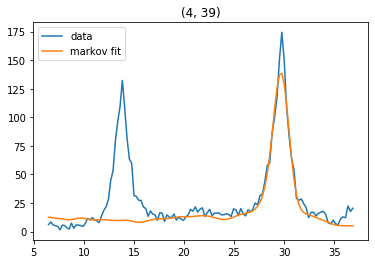

(16, 37)
                    Co     Omega       Gamma  delta_width  delta_amplitude  \
Values    3.744692e-11  9.096079  648.593649     0.759753         5.728057   
StdErrs            NaN       NaN         NaN          NaN              NaN   
Initials  1.000000e+00  7.580458    0.599210     0.500000         0.100000   

                   A        mu      sigma     shift     offset  
Values    526.313789 -8.885761  14.040363 -0.056772   5.754136  
StdErrs          NaN       NaN        NaN       NaN        NaN  
Initials  584.360181 -8.226829  15.600274  0.000000  46.167002  


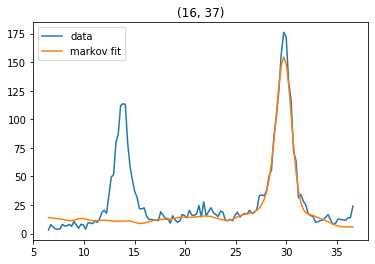

(25, 51)
                    Co     Omega       Gamma  delta_width  delta_amplitude  \
Values    6.552531e-16  6.076344  127.120259     0.716856         6.024221   
StdErrs            NaN       NaN         NaN          NaN              NaN   
Initials  1.000000e+00  7.580458    0.599210     0.500000         0.100000   

                   A        mu      sigma     shift     offset  
Values    563.425079 -7.858291  14.040247 -0.328411   4.053027  
StdErrs          NaN       NaN        NaN       NaN        NaN  
Initials  584.360181 -8.226829  15.600274  0.000000  46.167002  


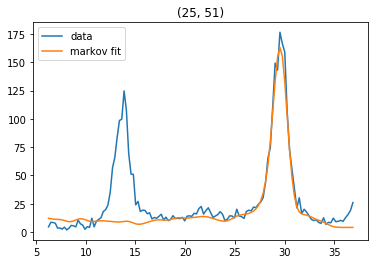

(27, 32)
                    Co     Omega      Gamma  delta_width  delta_amplitude  \
Values    1.889794e-11  9.081388  47.582972     0.769846         5.585925   
StdErrs            NaN       NaN        NaN          NaN              NaN   
Initials  1.000000e+00  7.580458   0.599210     0.500000         0.100000   

                   A        mu      sigma     shift     offset  
Values    583.492140 -8.907447  17.160251  0.178244   4.623677  
StdErrs          NaN       NaN        NaN       NaN        NaN  
Initials  584.360181 -8.226829  15.600274  0.000000  46.167002  


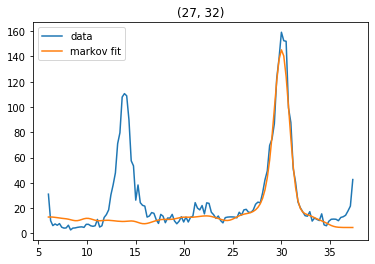

(31, 29)
                    Co     Omega       Gamma  delta_width  delta_amplitude  \
Values    7.690624e-12  6.079527  171.628208     0.750752         5.587047   
StdErrs            NaN       NaN         NaN          NaN              NaN   
Initials  1.000000e+00  7.580458    0.599210     0.500000         0.100000   

                   A        mu      sigma     shift     offset  
Values    532.230761 -9.018149  17.160300  0.272375   4.777764  
StdErrs          NaN       NaN        NaN       NaN        NaN  
Initials  584.360181 -8.226829  15.600274  0.000000  46.167002  


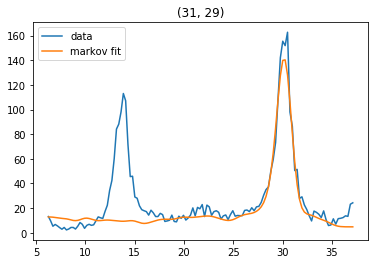

(62, 56)
                    Co     Omega       Gamma  delta_width  delta_amplitude  \
Values    2.348792e-11  6.079527  273.544198     0.721599         5.976983   
StdErrs            NaN       NaN         NaN          NaN              NaN   
Initials  1.000000e+00  7.580458    0.599210     0.500000         0.100000   

                   A        mu      sigma     shift     offset  
Values    615.873725 -8.549212  14.040924 -0.069572   3.850075  
StdErrs          NaN       NaN        NaN       NaN        NaN  
Initials  584.360181 -8.226829  15.600274  0.000000  46.167002  


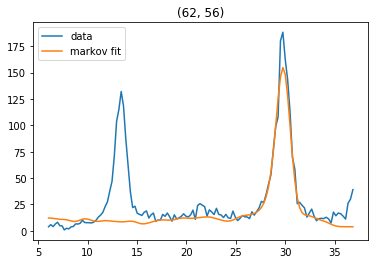

In [36]:
Plot_Elements_Spectrum(matrix, gamma_too_high, fit = 'markov')

In [31]:
too_bad = Get_Bad_Elements(matrix, boni, 1000)
too_good = Get_Good_Elements(matrix, boni, 50)

I found 11 bad elements 

I found 5106 good elements 



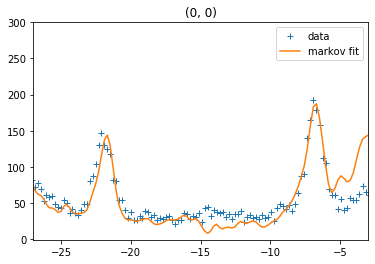

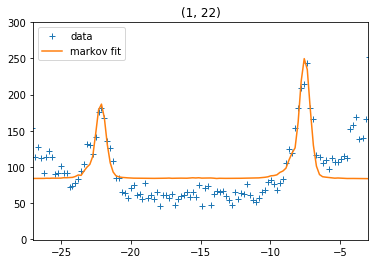

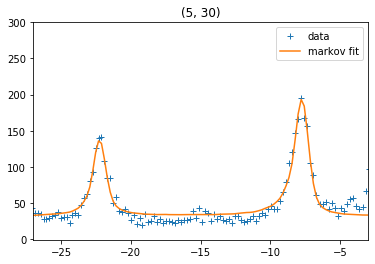

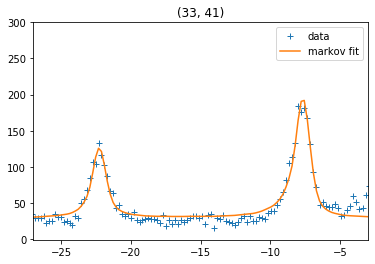

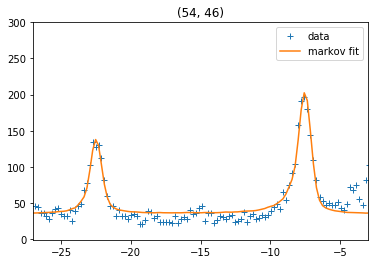

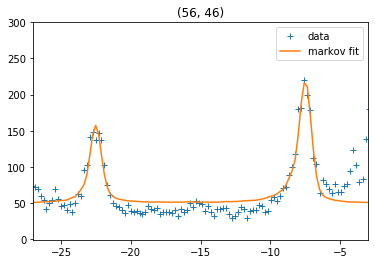

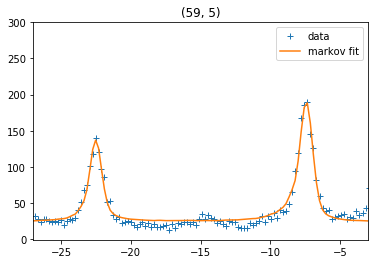

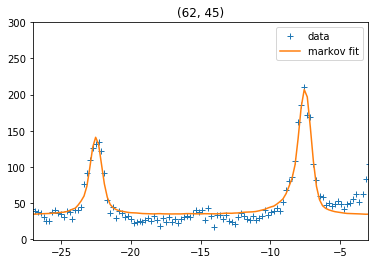

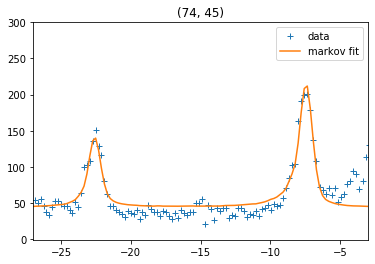

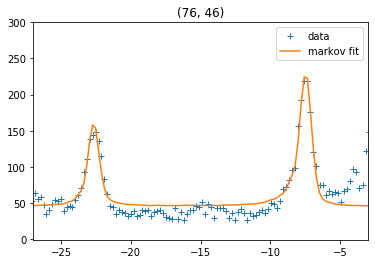

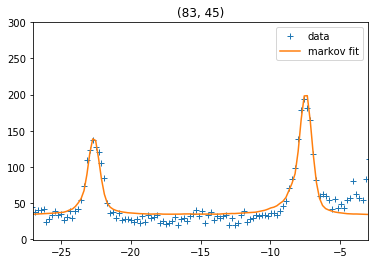

(0, 0)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.749137  7.497017  0.112262     0.413280        28.112492   
StdErrs   0.122241  0.021319  0.015795     0.009119         1.128417   
Initials  1.000000  7.580458  0.599210     0.500000         0.100000   

                     A        mu      sigma     shift     offset  
Values    6.421891e+02 -7.404147  14.040247  0.670726  -4.785778  
StdErrs   3.382805e+08  3.390560   2.732722  0.009875   0.932164  
Initials  5.843602e+02 -8.226829  15.600274  0.000000  46.167002  


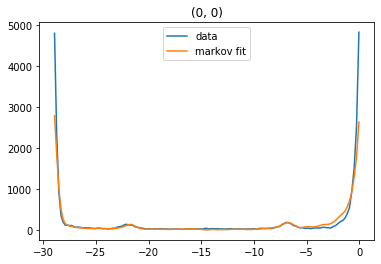

(1, 22)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.305137  7.658503  0.017838     0.029393         0.000002   
StdErrs        NaN       NaN       NaN          NaN              NaN   
Initials  1.000000  7.580458  0.599210     0.500000         0.100000   

                   A        mu      sigma     shift     offset  
Values    606.515682 -7.404505  14.040249  0.153165  83.441988  
StdErrs          NaN       NaN        NaN       NaN        NaN  
Initials  584.360181 -8.226829  15.600274  0.000000  46.167002  


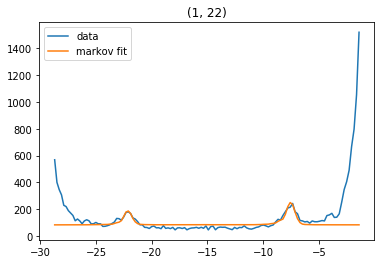

(5, 30)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.801346  7.719934  0.106939     0.001413         2.514955   
StdErrs        NaN       NaN       NaN          NaN              NaN   
Initials  1.000000  7.580458  0.599210     0.500000         0.100000   

                   A        mu      sigma     shift     offset  
Values    573.756722 -7.404147  16.008094 -0.068702  31.272624  
StdErrs          NaN       NaN        NaN       NaN        NaN  
Initials  584.360181 -8.226829  15.600274  0.000000  46.167002  


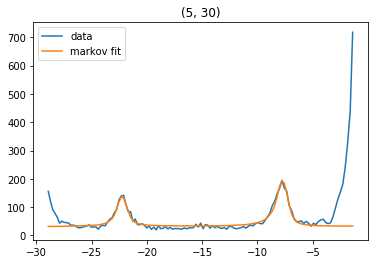

(33, 41)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.875693  7.669615  0.130738     0.000868         7.349968   
StdErrs        NaN       NaN       NaN          NaN              NaN   
Initials  1.000000  7.580458  0.599210     0.500000         0.100000   

                   A        mu      sigma     shift     offset  
Values    638.981989 -8.106909  17.160302 -0.037018  28.521861  
StdErrs          NaN       NaN        NaN       NaN        NaN  
Initials  584.360181 -8.226829  15.600274  0.000000  46.167002  


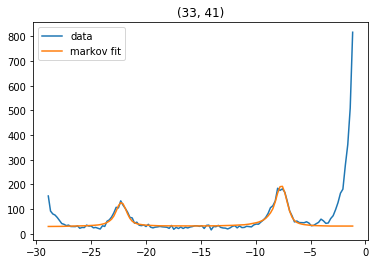

(54, 46)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.719306  7.494113  0.069576     0.000874         2.963283   
StdErrs        NaN       NaN       NaN          NaN              NaN   
Initials  1.000000  7.580458  0.599210     0.500000         0.100000   

                   A        mu      sigma     shift     offset  
Values    593.995380 -9.049512  16.160877 -0.092183  34.510163  
StdErrs          NaN       NaN        NaN       NaN        NaN  
Initials  584.360181 -8.226829  15.600274  0.000000  46.167002  


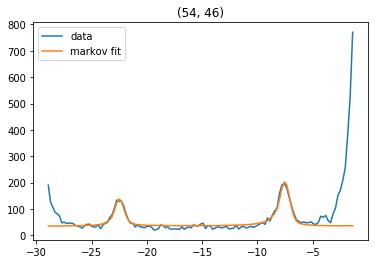

(56, 46)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.651399  7.465887  0.067821     0.000665         3.629148   
StdErrs        NaN       NaN       NaN          NaN              NaN   
Initials  1.000000  7.580458  0.599210     0.500000         0.100000   

                   A        mu      sigma     shift     offset  
Values    640.682187 -9.049512  14.040249 -0.090147  49.253890  
StdErrs          NaN       NaN        NaN       NaN        NaN  
Initials  584.360181 -8.226829  15.600274  0.000000  46.167002  


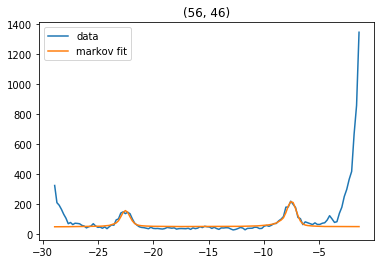

(59, 5)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.712592  7.419305  0.083207     0.005858         1.047918   
StdErrs        NaN       NaN       NaN          NaN              NaN   
Initials  1.000000  7.580458  0.599210     0.500000         0.100000   

                   A        mu      sigma     shift     offset  
Values    590.310120 -8.511647  14.040247 -0.039349  23.416692  
StdErrs          NaN       NaN        NaN       NaN        NaN  
Initials  584.360181 -8.226829  15.600274  0.000000  46.167002  


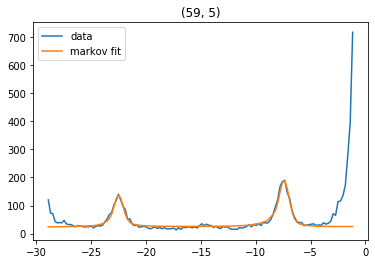

(62, 45)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.798707  7.484374  0.077018      0.00038         5.515714   
StdErrs        NaN       NaN       NaN          NaN              NaN   
Initials  1.000000  7.580458  0.599210      0.50000         0.100000   

                   A        mu      sigma     shift     offset  
Values    583.688196 -7.504158  17.160302 -0.094189  32.733234  
StdErrs          NaN       NaN        NaN       NaN        NaN  
Initials  584.360181 -8.226829  15.600274  0.000000  46.167002  


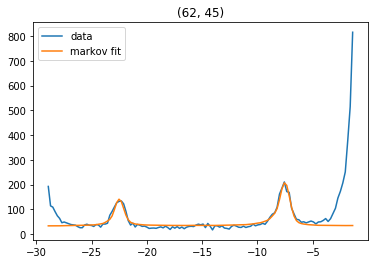

(74, 45)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.772873  7.390635  0.082744     0.002571         3.448516   
StdErrs        NaN       NaN       NaN          NaN              NaN   
Initials  1.000000  7.580458  0.599210     0.500000         0.100000   

                   A        mu      sigma     shift     offset  
Values    579.718560 -8.107984  17.160300 -0.085351  43.539704  
StdErrs          NaN       NaN        NaN       NaN        NaN  
Initials  584.360181 -8.226829  15.600274  0.000000  46.167002  


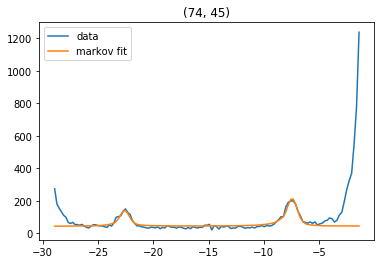

(76, 46)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.634077  7.375092  0.056008     0.000814         2.796576   
StdErrs        NaN       NaN       NaN          NaN              NaN   
Initials  1.000000  7.580458  0.599210     0.500000         0.100000   

                   A        mu      sigma     shift     offset  
Values    640.333331 -8.857306  14.045352 -0.144683  44.767042  
StdErrs          NaN       NaN        NaN       NaN        NaN  
Initials  584.360181 -8.226829  15.600274  0.000000  46.167002  


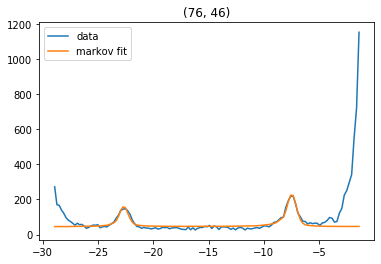

(83, 45)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.667068  7.374271  0.073274     0.002483         1.503186   
StdErrs        NaN       NaN       NaN          NaN              NaN   
Initials  1.000000  7.580458  0.599210     0.500000         0.100000   

                   A        mu      sigma    shift     offset  
Values    527.582921 -8.818473  14.040247 -0.12588  32.627179  
StdErrs          NaN       NaN        NaN      NaN        NaN  
Initials  584.360181 -8.226829  15.600274  0.00000  46.167002  


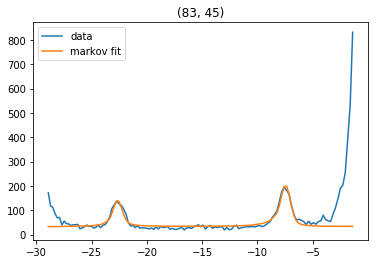

In [34]:
Zoom_Plot(matrix, too_bad, (-27, -3), (-1, 300), fit = 'markov')
Plot_Elements_Spectrum(matrix, too_bad,  fit = 'markov')

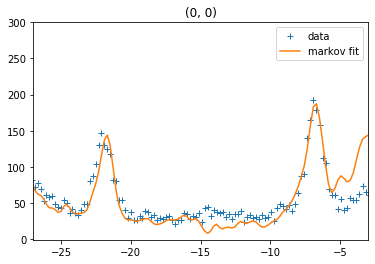

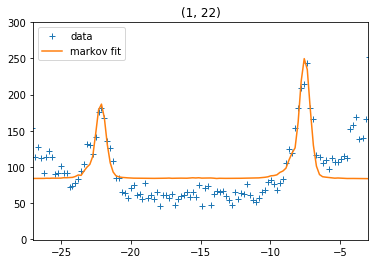

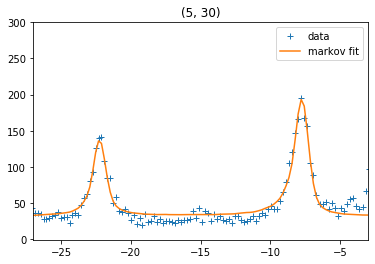

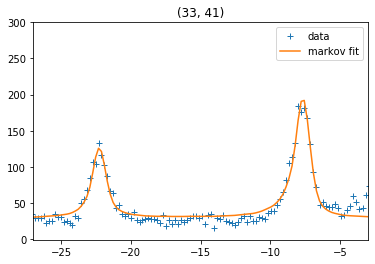

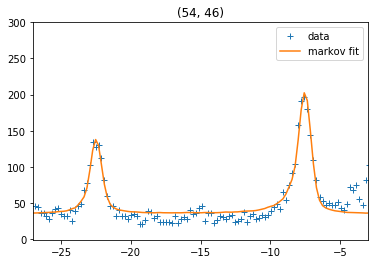

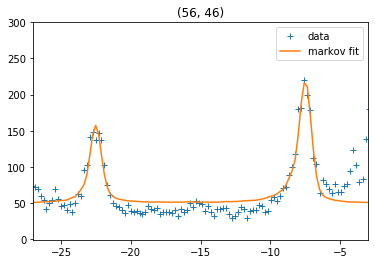

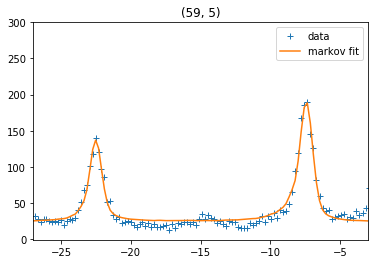

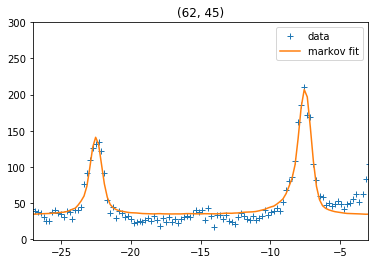

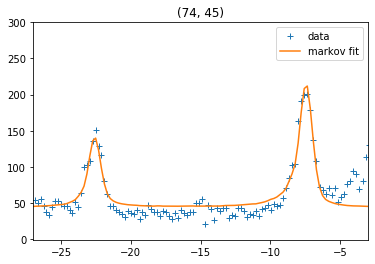

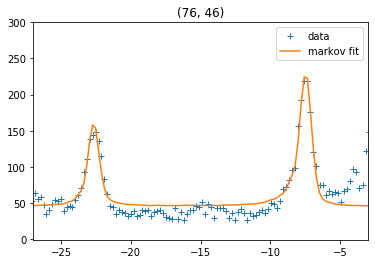

(0, 0)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.749137  7.497017  0.112262     0.413280        28.112492   
StdErrs   0.122241  0.021319  0.015795     0.009119         1.128417   
Initials  1.000000  7.580458  0.599210     0.500000         0.100000   

                     A        mu      sigma     shift     offset  
Values    6.421891e+02 -7.404147  14.040247  0.670726  -4.785778  
StdErrs   3.382805e+08  3.390560   2.732722  0.009875   0.932164  
Initials  5.843602e+02 -8.226829  15.600274  0.000000  46.167002  


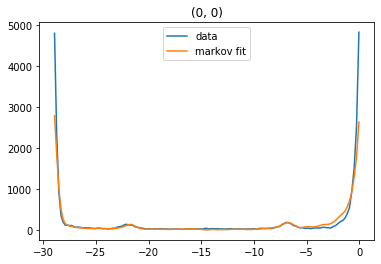

(0, 1)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.841622  7.455161  0.131706     0.946832         1.911739   
StdErrs   0.817619  0.021282  0.015699     0.038444         0.249602   
Initials  1.000000  7.580458  0.599210     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    6.422061e+02  -7.404147  14.040247 -0.052558  18.966607  
StdErrs   8.578859e+08  17.389321  16.097890  0.015623   1.438204  
Initials  5.843602e+02  -8.226829  15.600274  0.000000  46.167002  


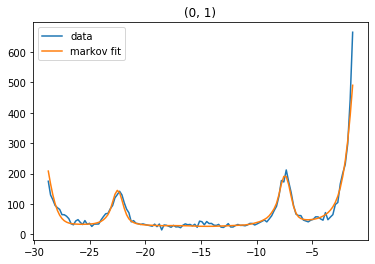

(0, 2)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.810626  7.425101  0.131655     0.951975         1.799393   
StdErrs   0.802433  0.021796  0.016591     0.040640         0.243576   
Initials  1.000000  7.580458  0.599210     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    5.981340e+02  -7.404147  14.040247 -0.051828  20.586066  
StdErrs   9.116273e+08  17.756921  16.439481  0.015892   1.435464  
Initials  5.843602e+02  -8.226829  15.600274  0.000000  46.167002  


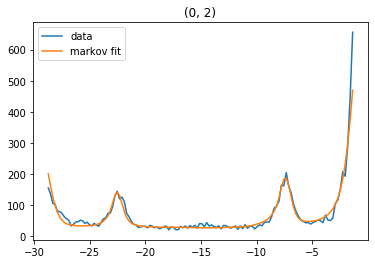

(0, 3)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.786009  7.430558  0.120457     0.745898         1.588548   
StdErrs   1.078078  0.022061  0.014859     0.046315         0.247701   
Initials  1.000000  7.580458  0.599210     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    5.264016e+02  -7.404147  14.040247 -0.074716  11.356801  
StdErrs   7.583598e+08  24.436285  22.719960  0.017855   1.187551  
Initials  5.843602e+02  -8.226829  15.600274  0.000000  46.167002  


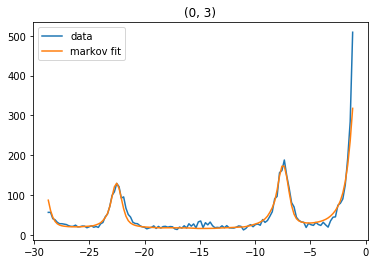

(0, 4)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.809551  7.473401  0.143876     0.751543         1.439113   
StdErrs   1.213244  0.021223  0.015256     0.053987         0.247752   
Initials  1.000000  7.580458  0.599210     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    6.427962e+02  -7.404147  14.040247 -0.056243  11.042580  
StdErrs   8.545473e+08  26.644605  24.732219  0.018856   1.072816  
Initials  5.843602e+02  -8.226829  15.600274  0.000000  46.167002  


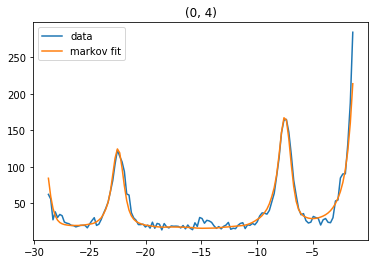

(0, 5)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.813496  7.461702  0.140188     0.809887         1.387784   
StdErrs   1.042064  0.021301  0.015436     0.046612         0.247521   
Initials  1.000000  7.580458  0.599210     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    6.427920e+02  -7.404147  14.040247 -0.133409  11.115695  
StdErrs   1.065675e+09  22.590202  21.171666  0.018072   1.183886  
Initials  5.843602e+02  -8.226829  15.600274  0.000000  46.167002  


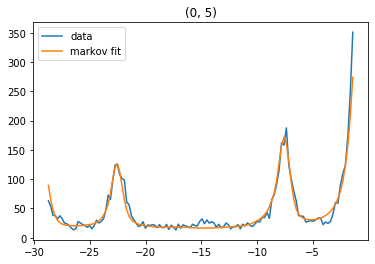

(0, 6)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.799709  7.503644  0.157088     0.843090         1.372362   
StdErrs   0.971239  0.022756  0.016810     0.045755         0.222483   
Initials  1.000000  7.580458  0.599210     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    5.425175e+02  -7.459436  14.040247 -0.117811  11.767894  
StdErrs   8.486364e+08  21.178486  19.990152  0.016633   1.106939  
Initials  5.843602e+02  -8.226829  15.600274  0.000000  46.167002  


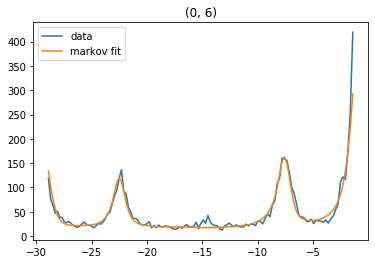

(0, 7)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.858682  7.520257  0.149573     0.963689         0.534413   
StdErrs   0.794215  0.021417  0.016634     0.061993         0.103522   
Initials  1.000000  7.580458  0.599210     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    5.259242e+02  -7.404147  15.657867  0.095650  11.326544  
StdErrs   1.071646e+09  20.991716  21.163523  0.020934   0.979981  
Initials  5.843602e+02  -8.226829  15.600274  0.000000  46.167002  


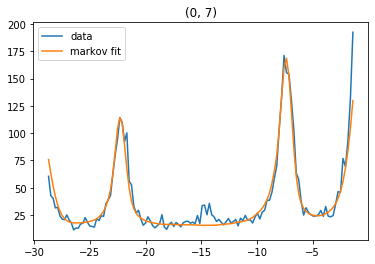

(0, 8)
               Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.80553  7.540638  0.142159     0.962869         0.639917   
StdErrs   0.90648  0.021134  0.015879     0.058073         0.122902   
Initials  1.00000  7.580458  0.599210     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    6.427720e+02  -7.404147  14.040247  0.073228  12.294410  
StdErrs   1.004783e+09  20.326404  18.501736  0.020476   0.949840  
Initials  5.843602e+02  -8.226829  15.600274  0.000000  46.167002  


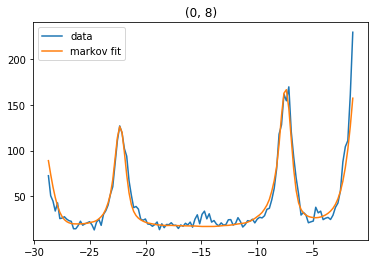

(0, 9)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.816077  7.529990  0.137779     0.888096         0.772985   
StdErrs   0.989629  0.020138  0.014862     0.062869         0.150066   
Initials  1.000000  7.580458  0.599210     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    5.259242e+02  -7.404147  14.040247  0.051060  11.541223  
StdErrs   9.178210e+08  21.798803  19.913624  0.018741   0.967578  
Initials  5.843602e+02  -8.226829  15.600274  0.000000  46.167002  


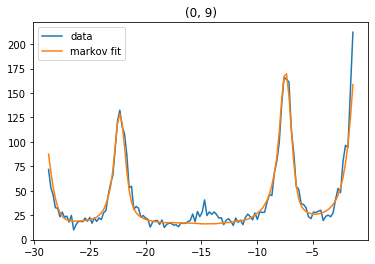

(0, 10)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.801111  7.525858  0.140815     0.988546         1.226538   
StdErrs   0.762873  0.021598  0.017114     0.041522         0.170736   
Initials  1.000000  7.580458  0.599210     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    6.427962e+02  -7.836484  14.040247  0.047679  16.267811  
StdErrs   1.020537e+09  16.199107  15.682353  0.019219   1.124668  
Initials  5.843602e+02  -8.226829  15.600274  0.000000  46.167002  


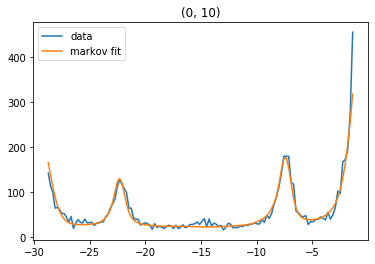

(0, 11)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.824767  7.543576  0.122631     0.514304         2.408396   
StdErrs   1.190911  0.021458  0.014042     0.049988         0.473503   
Initials  1.000000  7.580458  0.599210     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    6.427959e+02  -7.404147  14.578277  0.064869   9.894852  
StdErrs   1.277448e+09  28.071985  26.555582  0.019132   0.957148  
Initials  5.843602e+02  -8.226829  15.600274  0.000000  46.167002  


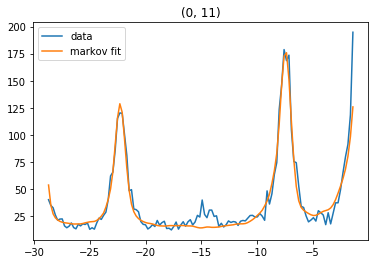

(0, 12)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.851427  7.585790  0.137808     0.001292            0.681   
StdErrs        NaN       NaN       NaN          NaN              NaN   
Initials  1.000000  7.580458  0.599210     0.500000            0.100   

                   A        mu      sigma     shift     offset  
Values    630.516603 -7.404147  15.269476  0.126421   9.912656  
StdErrs          NaN       NaN        NaN       NaN        NaN  
Initials  584.360181 -8.226829  15.600274  0.000000  46.167002  


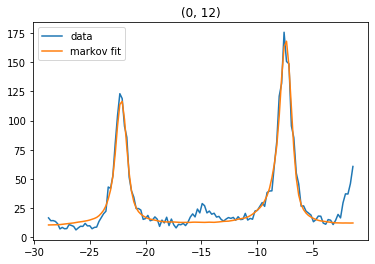

(0, 13)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.814581  7.576886  0.139754     0.862705         0.616036   
StdErrs   1.215636  0.020338  0.014860     0.072260         0.147279   
Initials  1.000000  7.580458  0.599210     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    5.259243e+02  -7.644608  14.040247  0.015615  11.064488  
StdErrs   8.887999e+08  25.714613  24.417095  0.019095   0.975402  
Initials  5.843602e+02  -8.226829  15.600274  0.000000  46.167002  


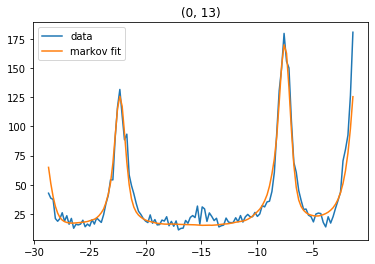

(0, 14)
                Co     Omega    Gamma  delta_width  delta_amplitude  \
Values    0.818724  7.590524  0.14759     0.742515         1.821826   
StdErrs   1.142163  0.022367  0.01593     0.047849         0.271138   
Initials  1.000000  7.580458  0.59921     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    6.427962e+02  -7.404147  14.040247 -0.046689  12.312963  
StdErrs   9.738638e+08  24.588845  22.766858  0.018224   1.141534  
Initials  5.843602e+02  -8.226829  15.600274  0.000000  46.167002  


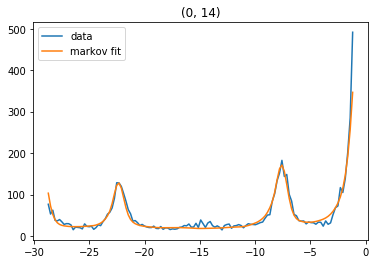

(0, 15)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.632659  7.617532  0.009820     0.893311         3.158219   
StdErrs   0.455402  0.004271  0.001394     0.029075         0.388703   
Initials  1.000000  7.580458  0.599210     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    5.259242e+02  -9.049512  14.040247 -0.163242  29.506922  
StdErrs   5.288069e+08  10.845591  12.007886  0.003240   1.749366  
Initials  5.843602e+02  -8.226829  15.600274  0.000000  46.167002  


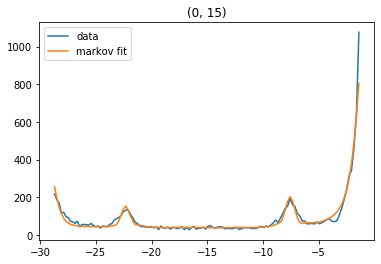

(0, 16)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.750693  7.549659  0.160632     0.920444         1.091706   
StdErrs   0.905664  0.023397  0.017727     0.049067         0.191878   
Initials  1.000000  7.580458  0.599210     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    6.427962e+02  -7.404147  14.040247 -0.091165  10.777476  
StdErrs   9.743075e+08  21.267286  19.805648  0.018253   1.074046  
Initials  5.843602e+02  -8.226829  15.600274  0.000000  46.167002  


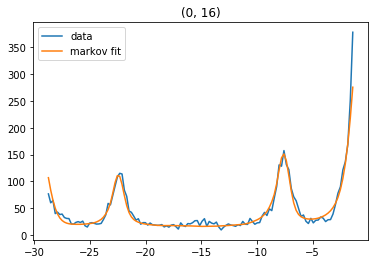

(0, 17)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.792661  7.617248  0.184356     0.860789         3.632758   
StdErrs   0.594805  0.027412  0.021551     0.027971         0.366103   
Initials  1.000000  7.580458  0.599210     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    5.259242e+02  -7.404147  14.040247 -0.194925  18.903693  
StdErrs   5.259966e+08  12.933916  12.247487  0.014790   1.438948  
Initials  5.843602e+02  -8.226829  15.600274  0.000000  46.167002  


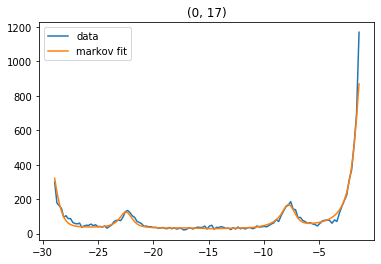

(0, 18)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.791794  7.612865  0.003742     0.751103         2.290540   
StdErrs   0.234199  0.000655  0.000236     0.026105         0.218412   
Initials  1.000000  7.580458  0.599210     0.500000         0.100000   

                     A        mu      sigma     shift     offset  
Values    6.327052e+02 -9.049512  14.854147 -0.375711  15.255250  
StdErrs   9.696000e+08  4.333743   5.770101  0.000631   0.782017  
Initials  5.843602e+02 -8.226829  15.600274  0.000000  46.167002  


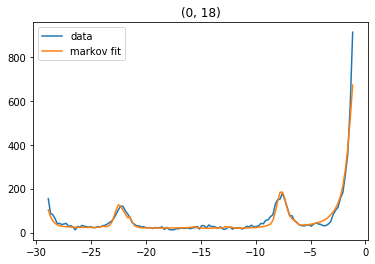

(0, 19)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.838737  7.653786  0.184069     1.039823         0.334070   
StdErrs   1.007644  0.023063  0.016861     0.061950         0.072554   
Initials  1.000000  7.580458  0.599210     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    5.265082e+02  -7.404147  14.040247  0.102585   7.766220  
StdErrs   9.881477e+08  21.512007  19.574325  0.020834   0.764015  
Initials  5.843602e+02  -8.226829  15.600274  0.000000  46.167002  


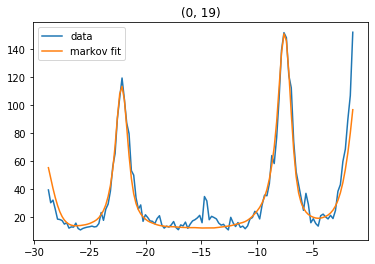

(0, 20)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.852960  7.746810  0.177473     0.748189         2.093802   
StdErrs   0.858087  0.023480  0.017216     0.036828         0.334970   
Initials  1.000000  7.580458  0.599210     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    5.259244e+02  -7.404147  14.040247 -0.214217  11.898257  
StdErrs   6.032858e+08  17.073368  16.180090  0.018530   1.183837  
Initials  5.843602e+02  -8.226829  15.600274  0.000000  46.167002  


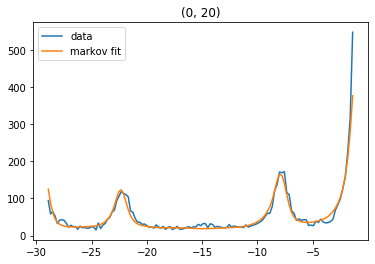

(0, 21)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.863575  7.739094  0.163508     0.997272         6.837370   
StdErrs   0.420066  0.030051  0.024270     0.018126         0.450608   
Initials  1.000000  7.580458  0.599210     0.500000         0.100000   

                     A        mu      sigma     shift     offset  
Values    6.427962e+02 -7.404147  14.040247 -0.004052  60.798131  
StdErrs   5.123192e+08  8.663759   7.871395  0.011503   2.345625  
Initials  5.843602e+02 -8.226829  15.600274  0.000000  46.167002  


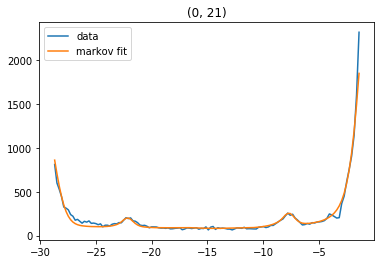

(0, 22)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.989754  7.727560  0.193070     0.992040         6.267396   
StdErrs   0.493925  0.029469  0.023816     0.019141         0.430847   
Initials  1.000000  7.580458  0.599210     0.500000         0.100000   

                     A        mu      sigma     shift     offset  
Values    6.427678e+02 -7.404147  14.040247 -0.012567  53.850427  
StdErrs   4.799758e+08  8.853877   8.093528  0.011495   2.183505  
Initials  5.843602e+02 -8.226829  15.600274  0.000000  46.167002  


KeyboardInterrupt: 

In [40]:
Zoom_Plot(matrix, too_bad[0:10], (-27, -3), (-1, 300), fit = 'markov')
Plot_Elements_Spectrum(matrix, too_good,  fit = 'markov')

In [41]:
matrix[0][0].Markov_Fit_Params

Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.749137  7.497017  0.112262     0.413280        28.112492   
StdErrs   0.122241  0.021319  0.015795     0.009119         1.128417   
Initials  1.000000  7.580458  0.599210     0.500000         0.100000   

                     A        mu      sigma     shift     offset  
Values    6.421891e+02 -7.404147  14.040247  0.670726  -4.785778  
StdErrs   3.382805e+08  3.390560   2.732722  0.009875   0.932164  
Initials  5.843602e+02 -8.226829  15.600274  0.000000  46.167002

In [16]:
too_good = Get_Good_Elements(matrix, boni, 100)

I found 554 good elements 



(4, 52)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.936044  6.122729  1.837499     0.040651       151.225324   
StdErrs   0.401837  0.414113  0.487279     0.001349        33.199978   
Initials  0.100000  7.653411  0.593839     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    6.848990e+02  11.936962  18.377639 -2.025096   0.437792  
StdErrs   1.111253e+09   4.977655   9.538267  0.000783   6.743473  
Initials  6.226355e+02  10.851784  16.706945  0.000000  25.234127  


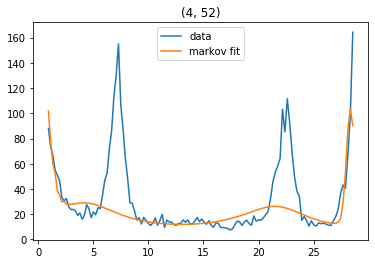

(8, 31)
                Co      Omega      Gamma  delta_width  delta_amplitude  \
Values    0.108844   9.184093   5.195512     0.592964         0.374641   
StdErrs   0.682042  10.706769  18.276592     0.040384         0.460784   
Initials  0.100000   7.653411   0.593839     0.500000         0.100000   

                     A          mu      sigma     shift     offset  
Values    6.456486e+02    9.766605  15.036250 -1.562358   2.670058  
StdErrs   1.815380e+09  107.028682  41.975514  0.136433   7.173589  
Initials  6.226355e+02   10.851784  16.706945  0.000000  25.234127  


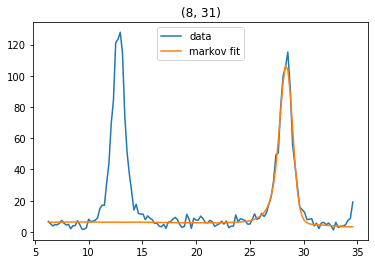

(15, 13)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    1.291735  7.272242  0.412123     1.047725         3.955965   
StdErrs   0.470308  0.047817  0.035621     0.015008         0.234834   
Initials  0.100000  7.653411  0.593839     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    6.848990e+02  11.936962  18.377639 -0.312763  20.097278  
StdErrs   3.738483e+08   5.283324  14.260862  0.014046   1.784456  
Initials  6.226355e+02  10.851784  16.706945  0.000000  25.234127  


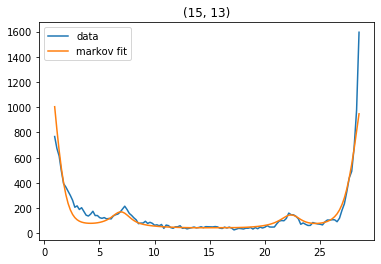

(18, 12)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    1.226580  7.223396  0.401590     1.044294         3.688598   
StdErrs   0.457051  0.048127  0.035520     0.015854         0.230931   
Initials  0.100000  7.653411  0.593839     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    5.603722e+02  11.936962  18.377639 -0.320957  19.045700  
StdErrs   3.479785e+08   5.457257  14.669638  0.014627   1.704248  
Initials  6.226355e+02  10.851784  16.706945  0.000000  25.234127  


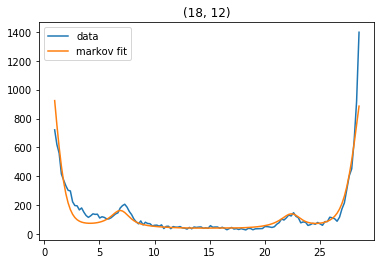

(21, 4)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.168639  9.184093  4.075050     0.638135         0.328205   
StdErrs   1.139623  4.034106  3.662149     0.035755         0.265883   
Initials  0.100000  7.653411  0.593839     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    5.711460e+02   9.766605  15.036293 -1.471051   1.277604  
StdErrs   1.282080e+09  14.419779  49.947969  0.112828   9.081239  
Initials  6.226355e+02  10.851784  16.706945  0.000000  25.234127  


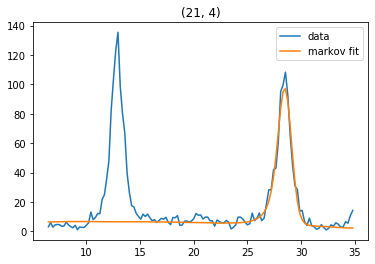

(24, 4)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.221223  9.184093  4.509136     0.656814         0.301510   
StdErrs   1.141096  4.192974  4.006695     0.033689         0.210745   
Initials  0.100000  7.653411  0.593839     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    6.050466e+02   9.766605  15.036957 -1.496284   0.471534  
StdErrs   1.279561e+09  18.768092  36.009707  0.106761   9.743616  
Initials  6.226355e+02  10.851784  16.706945  0.000000  25.234127  


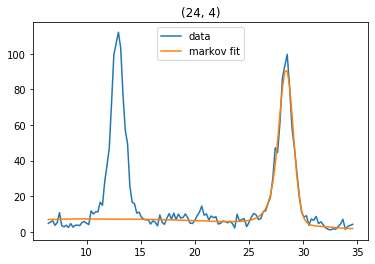

(25, 51)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    1.400655  7.259013  0.430523     1.120145         3.353489   
StdErrs   0.501770  0.048462  0.035233     0.016202         0.189668   
Initials  0.100000  7.653411  0.593839     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    5.603720e+02  11.936962  18.377639 -0.235040  20.045736  
StdErrs   4.009653e+08   5.007992  14.049503  0.013213   1.804397  
Initials  6.226355e+02  10.851784  16.706945  0.000000  25.234127  


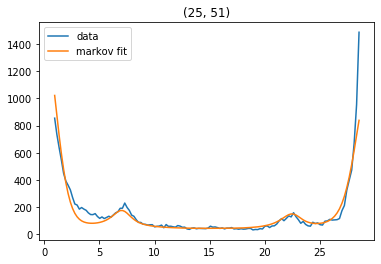

(25, 52)
                 Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    22.493356  6.122729  3.565461     0.999690         6.834000   
StdErrs    5.851490  0.379726  0.246779     0.011815         0.262759   
Initials   0.100000  7.653411  0.593839     0.500000         0.100000   

                     A         mu      sigma     shift      offset  
Values    6.848990e+02  10.652329  18.377639 -0.392936 -350.192915  
StdErrs   1.128929e+08   1.970457   4.642523  0.010054   43.680601  
Initials  6.226355e+02  10.851784  16.706945  0.000000   25.234127  


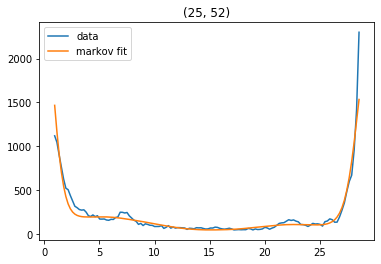

(26, 42)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    1.233555  7.345720  0.352549     1.086764         3.169022   
StdErrs   0.505019  0.040464  0.029492     0.017336         0.199442   
Initials  0.100000  7.653411  0.593839     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    6.842764e+02  11.936962  18.377639 -0.259224  19.039222  
StdErrs   4.225356e+08   5.692358  15.730908  0.013897   1.690050  
Initials  6.226355e+02  10.851784  16.706945  0.000000  25.234127  


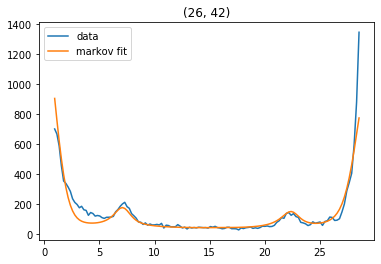

(26, 52)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    1.319757  7.335494  0.392419     1.062818         4.202538   
StdErrs   0.483979  0.044767  0.033837     0.015087         0.240660   
Initials  0.100000  7.653411  0.593839     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    5.603719e+02  11.936962  18.377639 -0.291945  22.554110  
StdErrs   3.456625e+08   5.233497  14.201784  0.013513   1.896627  
Initials  6.226355e+02  10.851784  16.706945  0.000000  25.234127  


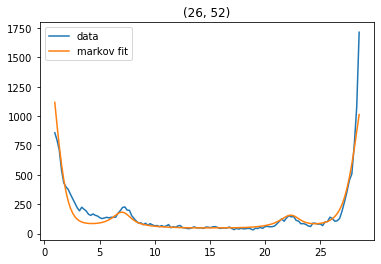

In [20]:
Plot_Elements_Spectrum(matrix, gamma_too_high[:10], fit = 'markov')

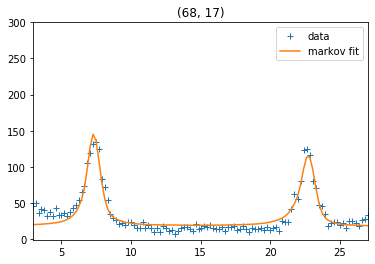

(0, 36)
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.784887  7.373686  0.130924     0.409924         7.975246   
StdErrs   1.393363  0.019817  0.013858     0.034917         1.256203   
Initials  0.100000  7.653411  0.593839     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    5.603827e+02  11.936962  18.377639  0.005702   0.195831  
StdErrs   7.562904e+08  21.274109  66.158051  0.016137   1.678078  
Initials  6.226355e+02  10.851784  16.706945  0.000000  25.234127  


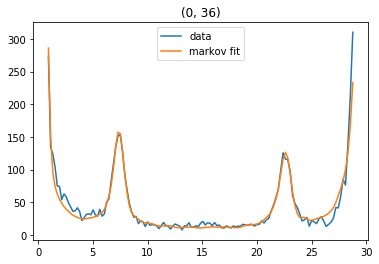

In [21]:
Zoom_Plot(matrix, too_bad[:15], (3, 27), (-1, 300), fit = 'markov')
Plot_Elements_Spectrum(matrix, [(0,36),], fit = 'markov')

In [25]:
matrix[0][36].Markov_Fit_Params


Co     Omega     Gamma  delta_position  delta_width  \
Values    0.081511  7.244183  0.163763       -0.721487     0.016236   
StdErrs   0.082772  0.021392  0.013935        0.021097     0.003848   
Initials  0.100000  7.795377  0.100000        0.000000     0.050000   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.021439  4.486952e+03  10.407430  14.014976  0.461297   
StdErrs          0.006555  9.191230e+09   9.323702  17.054197  0.020912   
Initials         0.100000  4.546282e+03  11.962272  16.790802  0.000000   

            offset  
Values    1.092631  
StdErrs   0.543591  
Initials  0.000000

Completata Parameter_Map per Omega
Ho trovato 67 elementi saturati


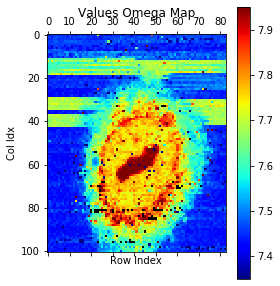

Completata Parameter_Map per Omega
Ho trovato 67 elementi saturati


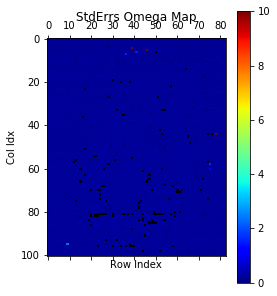

Completata Parameter_Map per Gamma
Ho trovato 67 elementi saturati


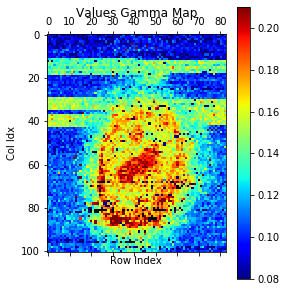

Completata Parameter_Map per Gamma
Ho trovato 67 elementi saturati


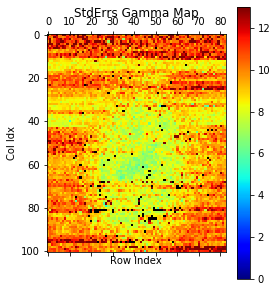

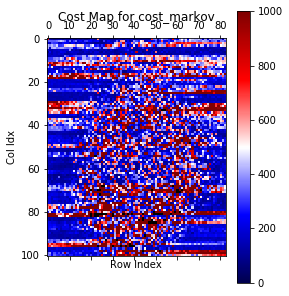

In [54]:
omega_markov_map, _ = Get_Parameter_Map('markov', 'Omega', matrix, n_rows, n_cols, excluded, 'jet', 7.35, 7.95, fig = 'omega_markov_map', path=now_path)
Delta_omega_markov_map, _ = Get_Parameter_Map('markov', 'Omega', matrix, n_rows, n_cols, excluded, 'jet', 0,10, fig = 'Delta_omega_markov_map', path=now_path, Deltas = True)
gamma_markov_map, _ = Get_Parameter_Map('markov', 'Gamma', matrix, n_rows, n_cols, excluded, 'jet', 0.08,0.21, fig = 'Gamma_markov_map', path=now_path)
Delta_gamma_markov_map, _ = Get_Parameter_Map('markov', 'Gamma', matrix, n_rows, n_cols, excluded, 'jet', 0 , 13, fig = 'Delta_Gamma_markov_map', path=now_path, Deltas = True)
markov_cost_map = Get_cost_map(matrix, 'markov', len(rows), len(cols), 'markov_cost_map', path = now_path)

In [11]:
################ TOTALE

with open(now_path+'y_tot_fit.txt', 'r') as fin:
    y_fits = fin.readlines()

with open(now_path+'cost_tot.txt', 'r') as fin:
    costi = fin.readlines()
with open(now_path+'tot_fit_params.txt', 'r') as fin:
    lines   =   fin.readlines()

if (len(boni) != len(lines)):
    raise ValueError("Incompatibilità tra lunghezza file parametri ({}) e informazioni fit ({})".format(len(boni), len(lines)))

for (line, y_fit, cost, (ii,jj)) in zip(lines, y_fits, costi,  boni) :
#for (line, cost, (ii,jj)) in zip(lines, costi,  boni) :
    matrix[ii][jj].Recover_Tot_Fit_Params(line)
    matrix[ii][jj].Recover_y_fit(np.array(y_fit[1:-2].split(), dtype = float))
    matrix[ii][jj].Recover_cost_tot(float(cost))

print('Ok ho recuperato le informazioni del Fit Totale')

Ok ho recuperato le informazioni del Fit Totale


(60, 15)


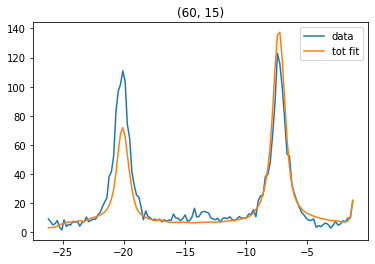

(60, 16)


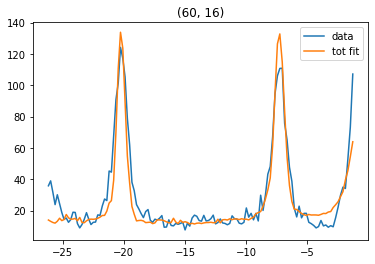

(60, 17)


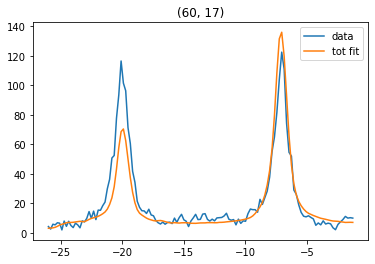

(60, 18)


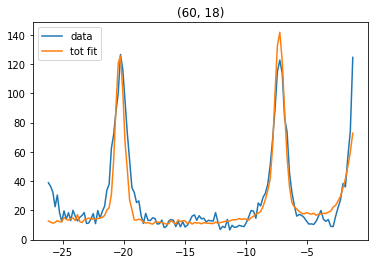

In [12]:
Plot_Elements_Spectrum(matrix, ((60, 15), (60, 16), (60, 17), (60,18)), fit = 'tot')

In [16]:
omega_tot_map, _ = Get_Parameter_Map('tot', 'Omega', matrix, n_rows, n_cols, excluded, 'seismic', 7.3, 8.65, fig = 'omega_tot_map', path=now_path)
Delta_omega_tot_map, _ = Get_Parameter_Map('tot', 'Omega', matrix, n_rows, n_cols, excluded, 'seismic', 0,0.7, fig = 'Delta_omega_tot_map', path=now_path, Deltas = True)
gamma_tot_map, _ = Get_Parameter_Map('tot', 'Gamma', matrix, n_rows, n_cols, excluded, 'seismic', 0.1,0.25, fig = 'Gamma_tot_map', path=now_path)
Delta_gamma_tot_map, _ = Get_Parameter_Map('tot', 'Gamma', matrix, n_rows, n_cols, excluded, 'seismic', 0,0.05, fig = 'Delta_gamma_tot_map', path=now_path, Deltas = True)
tau_map, _ = Get_Parameter_Map('tot', 'tau', matrix, n_rows, n_cols, excluded, 'seismic', 0., 1., fig = 'tau_map', path=now_path)
Delta_tau_map, _ = Get_Parameter_Map('tot', 'tau', matrix, n_rows, n_cols, excluded, 'seismic', 0,0.7, fig = 'Delta_tau_map', path=now_path, Deltas = True)

AttributeError: 'Spectrum' object has no attribute 'Tot_Fit_Params'

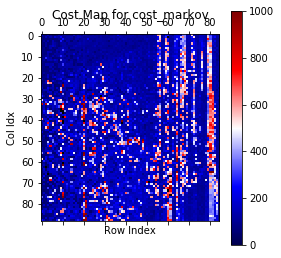

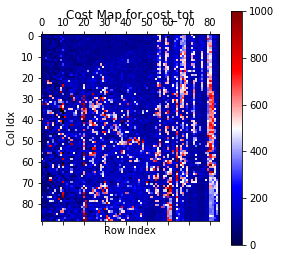

In [30]:
markov_cost_map = Get_cost_map(matrix, 'markov', len(rows), len(cols), 'markov_cost_map', path = now_path)
tot_cost_map = Get_cost_map(matrix, 'tot', len(rows), len(cols), 'tot_cost_map', path = now_path)


(0, 0)


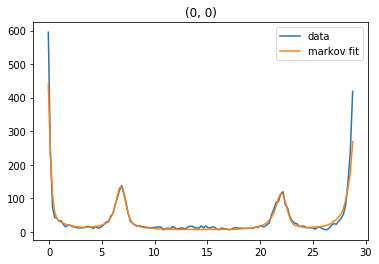

(0, 1)


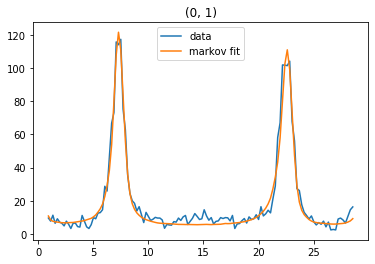

(0, 2)


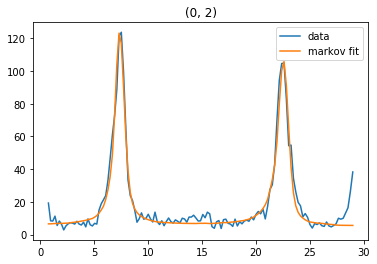

(0, 3)


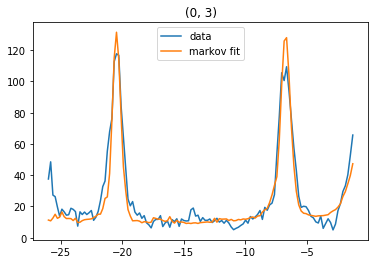

(0, 4)


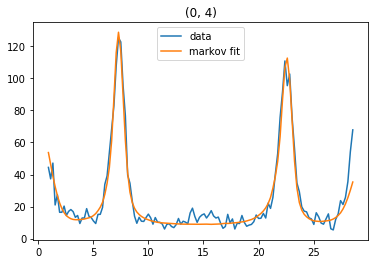

(0, 5)


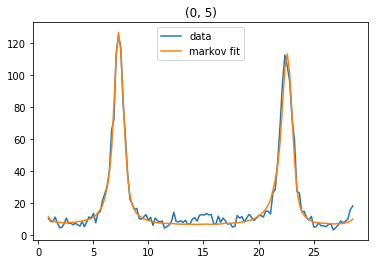

(0, 6)


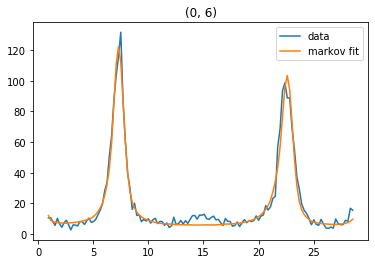

(0, 7)


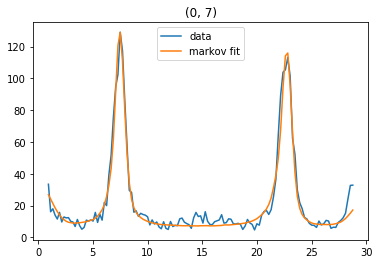

(0, 8)


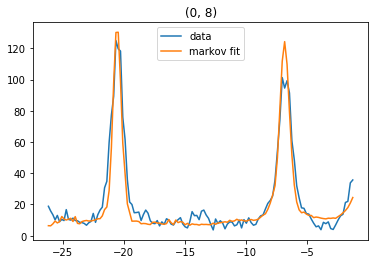

(0, 9)


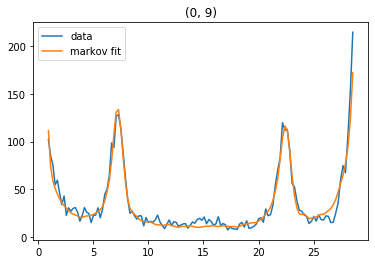

(0, 10)


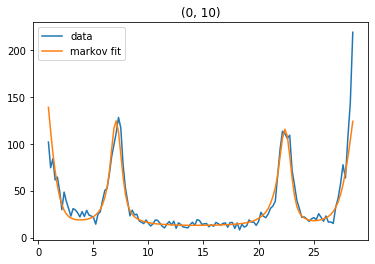

(0, 11)


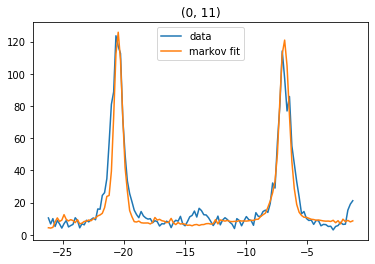

(0, 12)


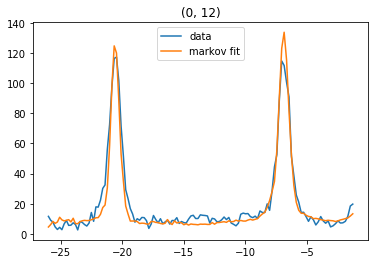

(0, 13)


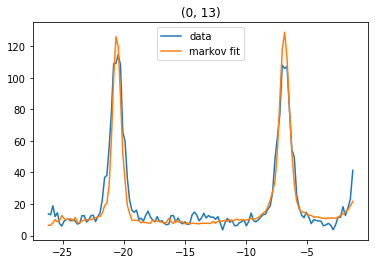

(0, 14)


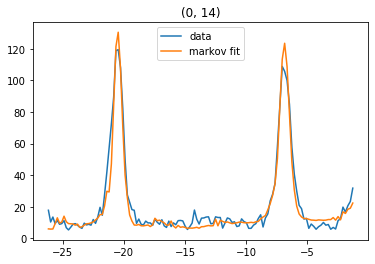

(0, 15)


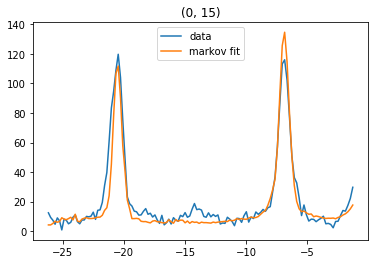

(0, 16)


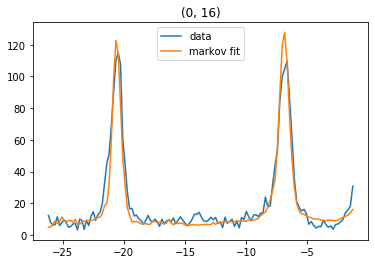

(0, 17)


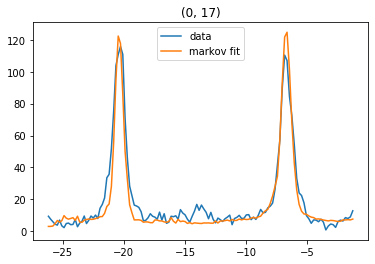

(0, 18)


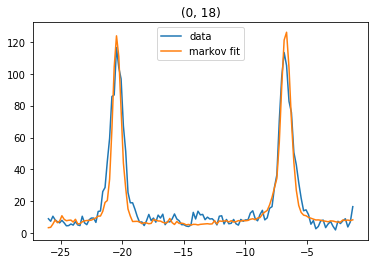

(0, 19)


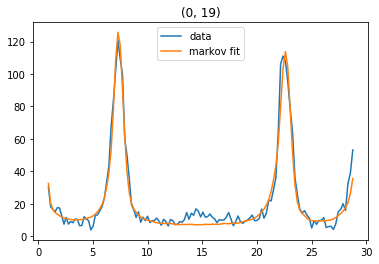

In [33]:
Plot_Elements_Spectrum(matrix, boni[0:20], fit = 'markov')

In [34]:
for (ii,jj) in boni[0:20]:
    print(matrix[ii][jj].Markov_Fit_Params)


Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.690403  7.380093  0.119961     0.346559         4.526239   
StdErrs   0.242094  0.019344  0.013036     0.036666         0.880408   
Initials  1.000000  7.653411  0.613204     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    6.848283e+02  10.409714  18.377639 -0.590578   0.756907  
StdErrs   7.409484e+08   7.496846  13.116684  0.015237   0.704313  
Initials  6.226355e+02  10.851784  16.706945  0.000000  22.742063  
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.576202  7.352200  0.103899     0.331096         0.327227   
StdErrs   0.931994  0.021399  0.013048     0.302070         0.579251   
Initials  1.000000  7.653411  0.613204     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    6.574410e+02   9.766605  15.731842 -0.046762   3.331091  
StdErrs   1.392425e+09  24.854